In [1]:
%run -i ../functions/load_packages.ipynb

# n_30 = pypsa.Network("../../pypsa-earth/networks/elec_s_30.nc")
# n_elec = pypsa.Network("../../pypsa-earth/networks/elec.nc")

regions_onshore = gpd.read_file("../../pypsa-earth-sec/pypsa-earth/resources/shapes/gadm_shapes.geojson")
regions_offshore = gpd.read_file("../../pypsa-earth-sec/pypsa-earth/resources/shapes/offshore_shapes.geojson")
# substations_OSMclean_path = "../../pypsa-earth/resources/osm/clean/all_clean_substations.geojson"

# lines_OSMclean_path = "../../pypsa-earth/resources/osm/clean/all_clean_lines.geojson"
industry_capacities = "../../pypsa-earth-sec/resources/custom_data/industrial_database.csv"

industry_share_ap = "../../pypsa-earth-sec/resources/custom_data/industry_sector_ratios_AP_2030.csv"
industry_share_nz = "../../pypsa-earth-sec/resources/custom_data/industry_sector_ratios_NZ_2030.csv"
industry_share_bs = "../../pypsa-earth-sec/resources/custom_data/industry_sector_ratios_BS_2030.csv"

industry_prod_ap  = "../../pypsa-earth-sec/resources/custom_data/industrial_production_per_country_tomorrow_2030_AP.csv"
industry_prod_nz  = "../../pypsa-earth-sec/resources/custom_data/industrial_production_per_country_tomorrow_2030_NZ.csv"
industry_prod_bs  = "../../pypsa-earth-sec/resources/custom_data/industrial_production_per_country_tomorrow_2030_BS.csv"


etotals_ap = "../../pypsa-earth-sec/data/energy_totals_AP_2030.csv"
etotals_nz = "../../pypsa-earth-sec/data/energy_totals_NZ_2030.csv"
etotals_bs = "../../pypsa-earth-sec/data/energy_totals_BS_2030.csv"

#2050 data
industry_share_ap_50 = "../../pypsa-earth-sec/resources/custom_data/industry_sector_ratios_AP_2050.csv"
industry_share_nz_50 = "../../pypsa-earth-sec/resources/custom_data/industry_sector_ratios_NZ_2050.csv"
industry_share_bs_50 = "../../pypsa-earth-sec/resources/custom_data/industry_sector_ratios_BS_2050.csv"

industry_prod_ap_50  = "../../pypsa-earth-sec/resources/custom_data/industrial_production_per_country_tomorrow_2050_AP.csv"
industry_prod_nz_50  = "../../pypsa-earth-sec/resources/custom_data/industrial_production_per_country_tomorrow_2050_NZ.csv"
industry_prod_bs_50  = "../../pypsa-earth-sec/resources/custom_data/industrial_production_per_country_tomorrow_2050_BS.csv"

etotals_ap_50 = "../../pypsa-earth-sec/data/energy_totals_AP_2050.csv"
etotals_nz_50 = "../../pypsa-earth-sec/data/energy_totals_NZ_2050.csv"
etotals_bs_50 = "../../pypsa-earth-sec/data/energy_totals_BS_2050.csv"

In [2]:
df = pd.read_csv(industry_capacities, keep_default_na=False,
        na_values=[""])

geometry = gpd.points_from_xy(df.y, df.x)
geo_df = gpd.GeoDataFrame(df, #specify our data
                          crs='epsg:4326', #specify our coordinate reference system
                          geometry=geometry) #specify the geometry list we created
geo_df.head()

,country,x,y,technology,capacity,unit,quality,company,location,start year,Latest renovation year,Source,Comments,geometry
0,NA,-22.189381,17.303929,Industry Steel Secondary EAF,1500.0,Kt/yr,actual,Hyron Steel Namibia plant,Khomas,Proposed,NaN,Tracker Map - Global Energy Monitor,NaN,POINT (17.30393 -22.18938)
1,NA,-17.777380,15.763281,Industry Steel Secondary EAF,3000.0,Kt/yr,actual,Groot Suisse Oshana steel plant,"Ongwediva, Oshana",2022,NaN,Tracker Map - Global Energy Monitor,NaN,POINT (15.76328 -17.77738)
2,NA,-26.659553,15.085991,Industry Chemical Ammonia Renewable,350.0,Kt/yr,actual,Hyphen Green Hydrogen project,Erongo,Proposed,NaN,Daures Green Village (gh2namibia.com),NaN,POINT (15.08599 -26.65955)
3,NA,-20.419305,16.676885,Industry NMM Cement,500.0,Kt/yr,actual,Whale Rock Cement (Pty) Ltd,Otjiwarongo,2018,NaN,Cheetah Cement to re-enter local market with m...,NaN,POINT (16.67688 -20.41931)
4,NA,-19.520701,17.448800,Industry NMM Cement,1000.0,Kt/yr,actual,Ohorongo Cement,Otavi,2010,NaN,About Us - Ohorongo Cement (PTY) Ltd (ohorongo...,NaN,POINT (17.44880 -19.52070)


[-2.91992e+00  1.50004e+03  3.00000e+03] 0    1500.00
1    3000.00
2     350.00
3     500.00
4    1000.00
5       0.08
6       2.10
7       3.30
Name: capacity, dtype: float64
[1.50000e+00 1.50004e+03 3.00000e+03] 0    1500.00
1    3000.00
2     350.00
3     500.00
4    1000.00
5       0.08
6       2.10
7       3.30
Name: capacity, dtype: float64


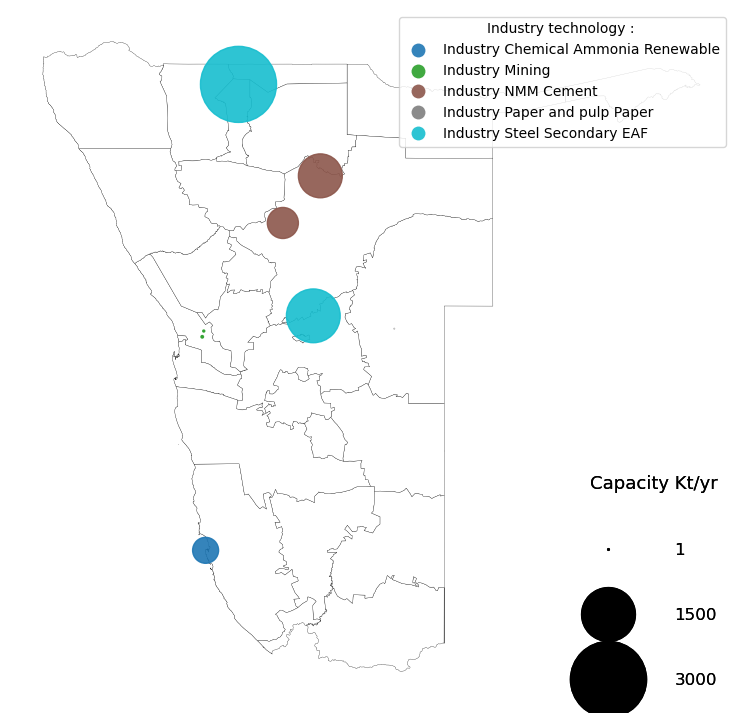

In [3]:
#plot gens
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(17, 9)
regions_onshore.to_crs(epsg=4326).plot(
                                        ax=ax, 
                                        color="white", 
                                        edgecolor="black", 
                                        linewidth=0.2)
markersize = geo_df['capacity']

geo_df.to_crs(epsg=4326).plot(
                                ax=ax,
                                column='technology',
                                alpha=0.9,
                                markersize=markersize, legend=True,
                                legend_kwds={'title': "Industry technology : ",
                                'frameon' : 'False'}
                                )
ax.set_axis_off()    

# need to add existing legend back
leg1 = ax.get_legend()

# some bins to indicate size in legend
_, bins = pd.cut(markersize, bins=2, precision=2, retbins=True)
print(bins, markersize)
bins[0] = 1.5
print(bins, markersize)
# create second legend
ax.add_artist(
    ax.legend(
        handles=[
            mlines.Line2D(
                [],
                [],
                color="black",
                lw=0,
                marker="o",
                markersize=np.sqrt(b),
                label=str(int(b)),
            )
            for i, b in enumerate(bins)
        ],
        loc=4,
        handletextpad=3.0,
        labelspacing=3,
        ncol=1,
        title="Capacity Kt/yr",
        title_fontsize=13,
        fontsize=12,
        frameon=False,
    )
)
# restore original legend
ax.add_artist(leg1)

Demand scenario,Ambitious Plans (AP) 2030,Net Zero (NZ) 2030,Base Line (BS) 2030,Ambitious Plans (AP) 2050,Net Zero (NZ) 2050,Base line (BS) 2050
Industry Steel Primary DRI,1275000,1275000,1275000,1894583,1894583,1894583
Industry Steel Secondary EAF,2550000,2550000,2550000,3789166,3789166,3789166
Industry Steel Other,1,1,1,1,1,1
Industry Chemical Other,1,1,1,1,1,1
Industry NMM Cement,739477,718349,739477,863632,837852,863632
Industry NMM Other,1,1,1,1,1,1
Industry Food and tobacco,1,1,1,1,1,1
Industry Construction,1,1,1,1,1,1
Industry Mining,1,1,1,1,1,1
Industry Machinery,1,1,1,1,1,1


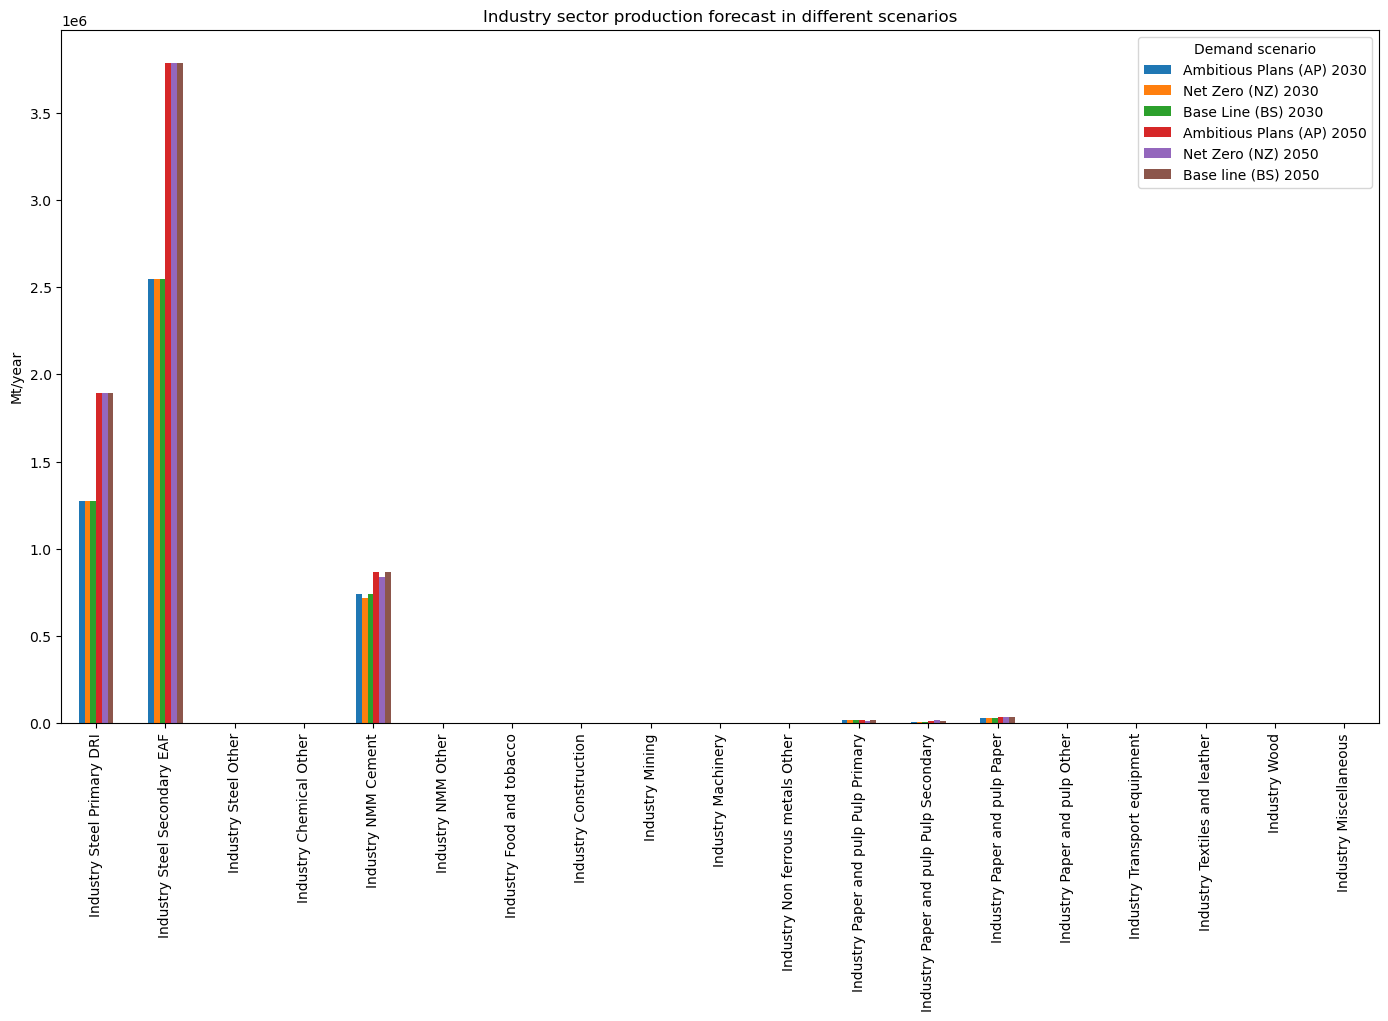

In [4]:
li = []
df=[]
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(17, 9)
df1 = pd.read_csv(industry_prod_ap, keep_default_na=False,na_values=[""])
df1["Demand scenario"] = "Ambitious Plans (AP) 2030"
li.append(df1)
df2 = pd.read_csv(industry_prod_nz, keep_default_na=False,na_values=[""])
df2["Demand scenario"] = "Net Zero (NZ) 2030"
li.append(df2)
df3 = pd.read_csv(industry_prod_bs, keep_default_na=False,na_values=[""])
df3["Demand scenario"] = "Base Line (BS) 2030"
li.append(df3)

df4 = pd.read_csv(industry_prod_ap_50, keep_default_na=False,na_values=[""])
df4["Demand scenario"] = "Ambitious Plans (AP) 2050"
li.append(df4)
df5 = pd.read_csv(industry_prod_nz_50, keep_default_na=False,na_values=[""])
df5["Demand scenario"] = "Net Zero (NZ) 2050"
li.append(df5)
df6 = pd.read_csv(industry_prod_bs_50, keep_default_na=False,na_values=[""])
df6["Demand scenario"] = "Base line (BS) 2050"
li.append(df6)

frame = pd.concat(li, axis=0, ignore_index=True)

df = frame.drop(['Mt/year'], axis=1)
df = df.set_index('Demand scenario')
df = df.transpose()
df= df.loc[(df!=0).any(axis=1)]
df.plot(kind="bar", title= "Industry sector production forecast in different scenarios", ylabel = "Mt/year", ax=ax)
# df.plot.bar(x='scenario', rot=1, title='Industrial production demand for 2030', figsize=(15,10), fontsize=12)
df

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot:title={'center':'Industry sector production forecast in different scenarios'}, xlabel='scenario', ylabel='Mt/year'>

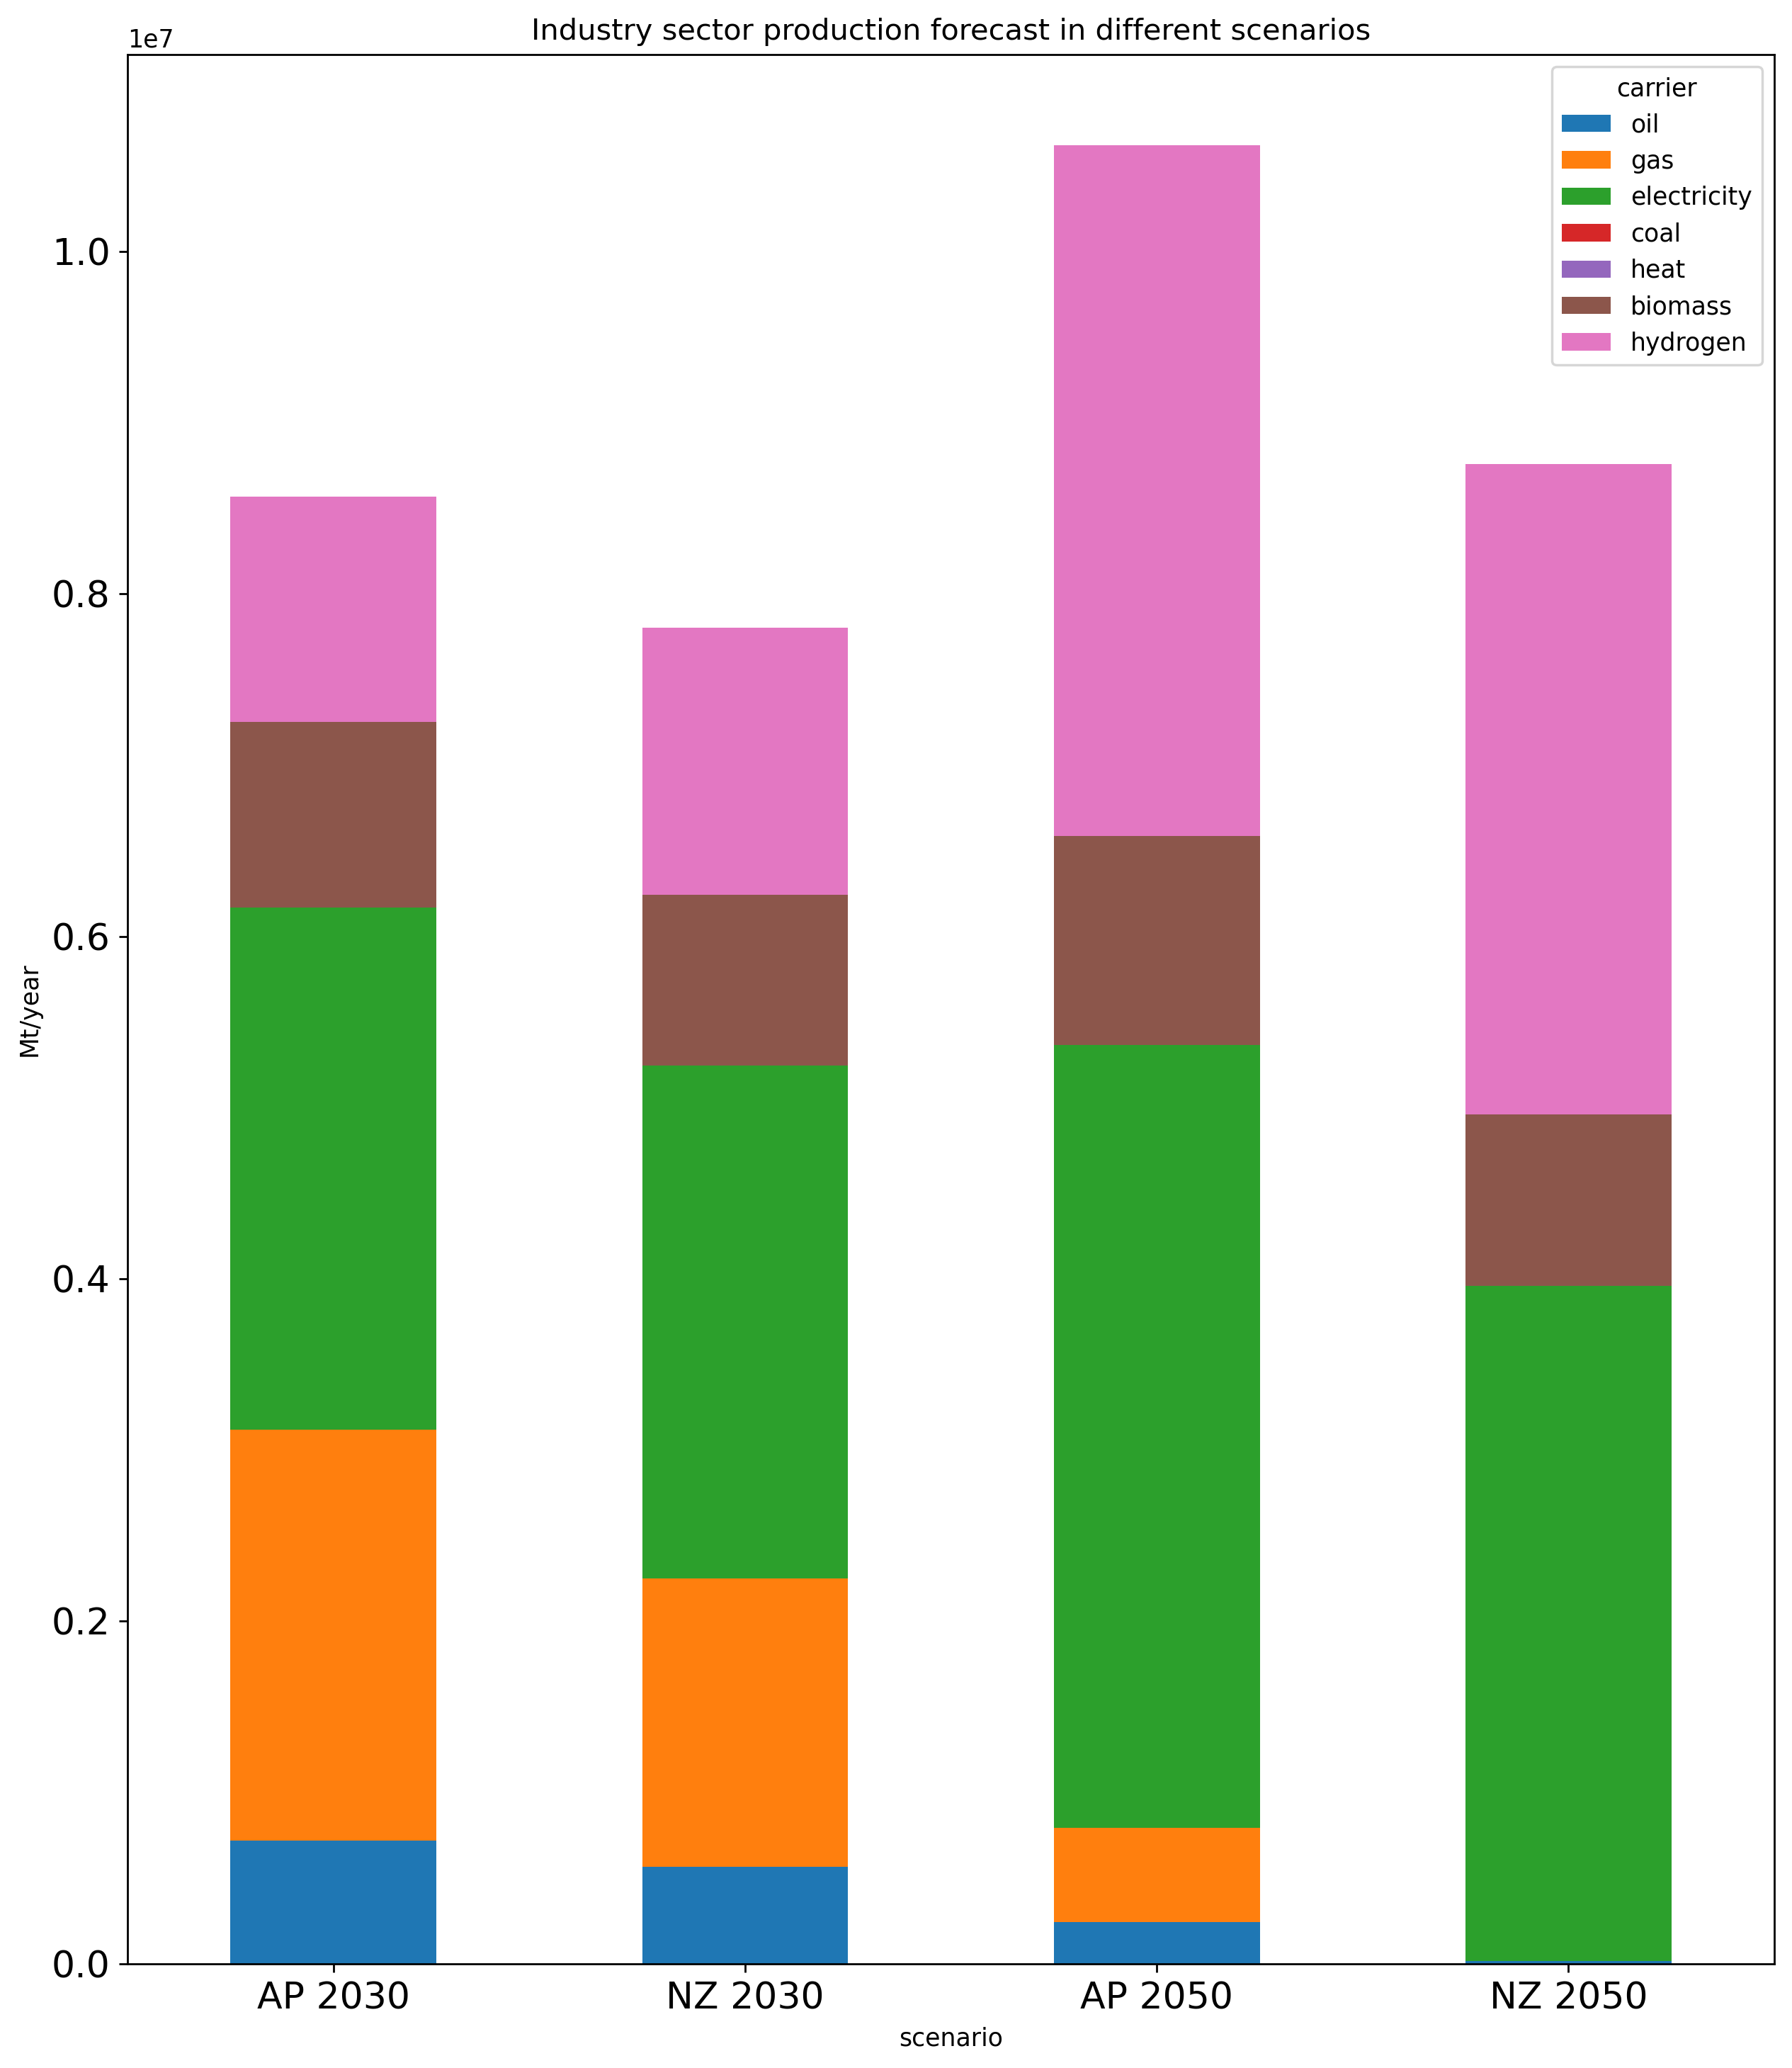

In [20]:
 
# li.append(df2)
#df = pd.concat(li, axis=0, ignore_index=False)
#df = df.drop(['Demand scenario'], axis=1)
# #df = df.set_index('Demand scenario')
# #df 
# #df.groupby('carrier')['Demand scenario'].plot(legend=True)
#add DataFrames to subplots
#df1.plot(ax=axes[0,0])
#df2.plot(ax=axes[0,1])
#df.plot.bar(x='carrier', rot=1, title='Industrial production demand for 2030', figsize=(15,10), fontsize=12)
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12, 14)
fig.set_dpi(250)
ax.legend(fontsize=14)
li=[]

df1 = pd.read_csv(industry_share_ap, keep_default_na=False,na_values=[""])
df1 = df1.set_index("carrier")
df1 = df1.drop("process emission")
df2 = pd.read_csv(industry_prod_ap, keep_default_na=False,na_values=[""])
df2.drop(['Mt/year'], axis=1, inplace=True)
df1.drop("Industry Steel Casting Rolling Finishing", axis=1, inplace=True)

#     # final energy consumption per node and industry (TWh/a)
df3 = df2.dot(df1.T)
df3['scenario']="AP 2030"
li.append(df3)

df1 = pd.read_csv(industry_share_nz, keep_default_na=False,na_values=[""])
df1 = df1.set_index("carrier")
df1 = df1.drop("process emission")
df2 = pd.read_csv(industry_prod_nz, keep_default_na=False,na_values=[""])
df2.drop(['Mt/year'], axis=1, inplace=True)
df1.drop("Industry Steel Casting Rolling Finishing", axis=1, inplace=True)

#     # final energy consumption per node and industry (TWh/a)
df3 = df2.dot(df1.T)
df3['scenario']="NZ 2030"
li.append(df3)

# df1 = pd.read_csv(industry_share_bs, keep_default_na=False,na_values=[""])
# df1 = df1.set_index("carrier")
# df1 = df1.drop("process emission")
# df2 = pd.read_csv(industry_prod_bs, keep_default_na=False,na_values=[""])
# df2.drop(['Mt/year'], axis=1, inplace=True)
# df1.drop("Industry Steel Casting Rolling Finishing", axis=1, inplace=True)

# #     # final energy consumption per node and industry (TWh/a)
# df3 = df2.dot(df1.T)
# df3.index=["BS 2030"]
# li.append(df3)

df1 = pd.read_csv(industry_share_ap_50, keep_default_na=False,na_values=[""])
df1 = df1.set_index("carrier")
df1 = df1.drop("process emission")
df2 = pd.read_csv(industry_prod_ap_50, keep_default_na=False,na_values=[""])
df2.drop(['Mt/year'], axis=1, inplace=True)
df1.drop("Industry Steel Casting Rolling Finishing", axis=1, inplace=True)

#     # final energy consumption per node and industry (TWh/a)
df3 = df2.dot(df1.T)
df3['scenario']="AP 2050"
li.append(df3)



df1 = pd.read_csv(industry_share_nz_50, keep_default_na=False,na_values=[""])
df1 = df1.set_index("carrier")
df1 = df1.drop("process emission")
df2 = pd.read_csv(industry_prod_nz_50, keep_default_na=False,na_values=[""])
df2.drop(['Mt/year'], axis=1, inplace=True)
df1.drop("Industry Steel Casting Rolling Finishing", axis=1, inplace=True)

#     # final energy consumption per node and industry (TWh/a)
df3 = df2.dot(df1.T)
df3['scenario']="NZ 2050"
li.append(df3)

# df1 = pd.read_csv(industry_share_bs_50, keep_default_na=False,na_values=[""])
# df1 = df1.set_index("carrier")
# df1 = df1.drop("process emission")
# df2 = pd.read_csv(industry_prod_bs_50, keep_default_na=False,na_values=[""])
# df2.drop(['Mt/year'], axis=1, inplace=True)
# df1.drop("Industry Steel Casting Rolling Finishing", axis=1, inplace=True)

# #     # final energy consumption per node and industry (TWh/a)
# df3 = df2.dot(df1.T)
# df3.index=["BS 2050"]
# li.append(df3)

frame = pd.concat(li, axis=0, ignore_index=True)
frame = frame.set_index('scenario')
# df = frame.drop(['Mt/year'], axis=1)
# df = df.set_index('Demand scenario')
# df = df.transpose()
# df= df.loc[(df!=0).any(axis=1)]
frame.plot(kind="bar",stacked = True,title= "Industry sector production forecast in different scenarios", rot=0, ylabel = "Mt/year", ax=ax, fontsize = 15)


<AxesSubplot:title={'center':'Energy carrier sectoral ratios in 2030 : Net Zero (NZ)'}, ylabel='Ratio'>

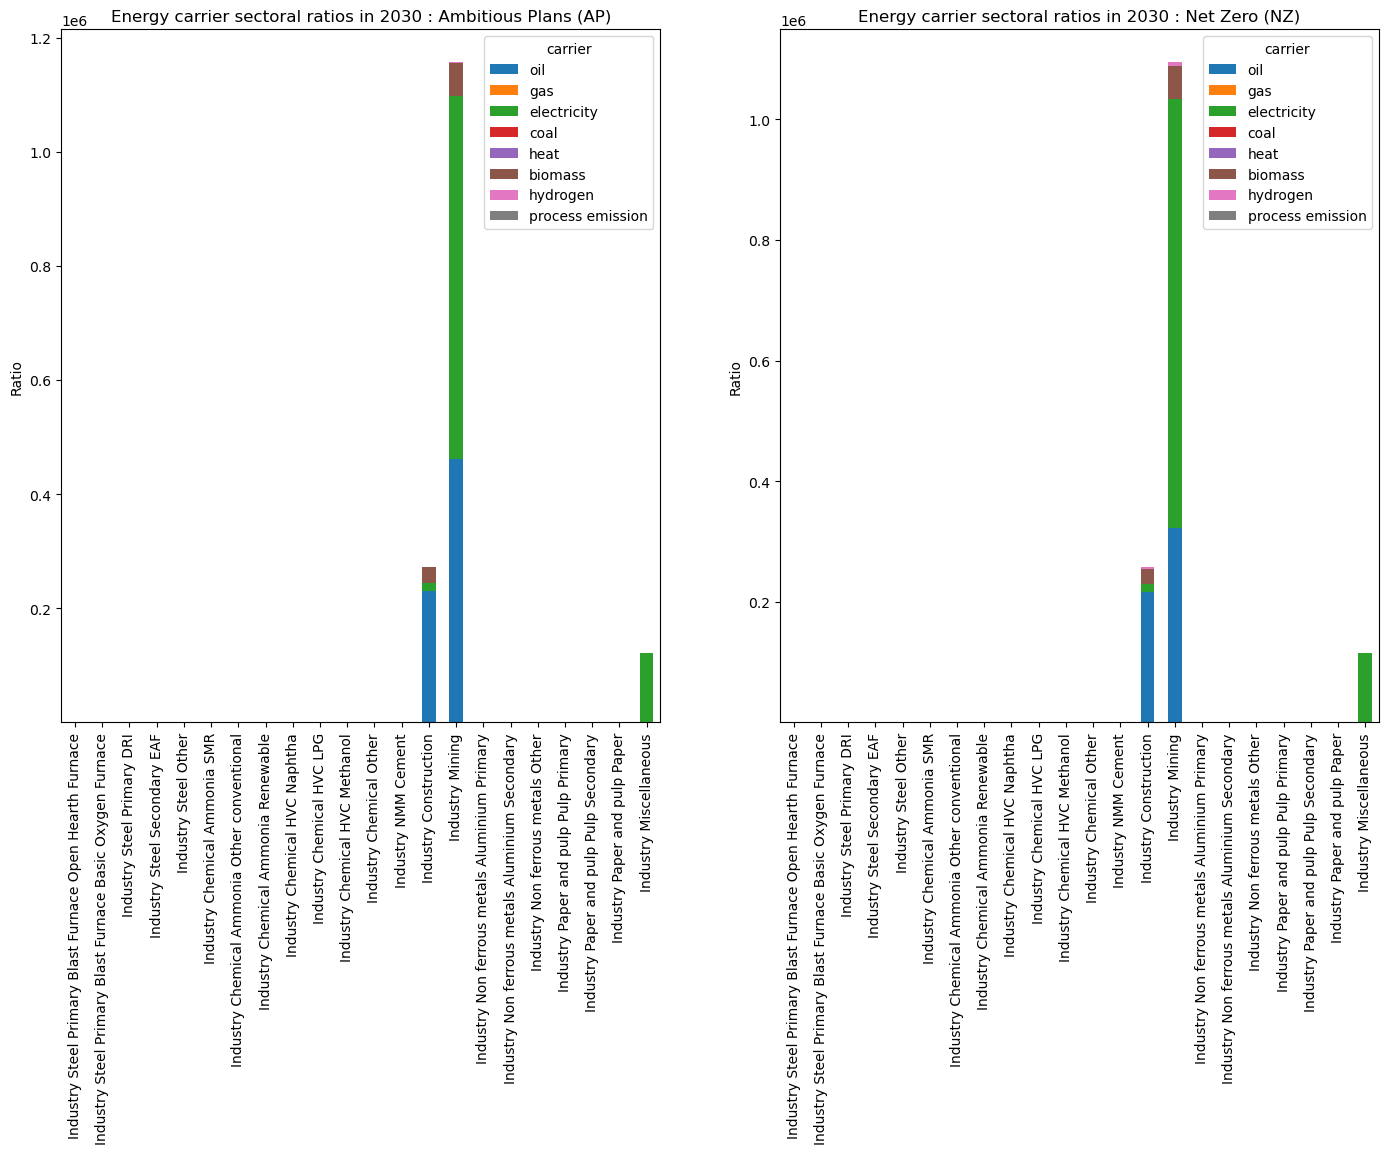

In [6]:
#define subplot layout
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(17, 9)

df1 = pd.read_csv(industry_share_ap, keep_default_na=False,na_values=[""])

df1 = df1.set_index('carrier')
df1 = df1.transpose()
df1= df1.loc[(df1!=0).any(axis=1)]

df1.plot(kind="bar", stacked = True, ax=ax[0], title= "Energy carrier sectoral ratios in 2030 : Ambitious Plans (AP)", ylabel = "Ratio")

df2 = pd.read_csv(industry_share_nz, keep_default_na=False,na_values=[""])
df2 = df2.set_index('carrier')
df2 = df2.transpose()
df2= df2.loc[(df2!=0).any(axis=1)]

df2.plot(kind="bar", stacked = True, ax=ax[1], title= "Energy carrier sectoral ratios in 2030 : Net Zero (NZ)", ylabel = "Ratio")

<AxesSubplot:title={'center':'Energy carrier sectoral ratios in 2050 : Net Zero (NZ)'}, ylabel='Ratio'>

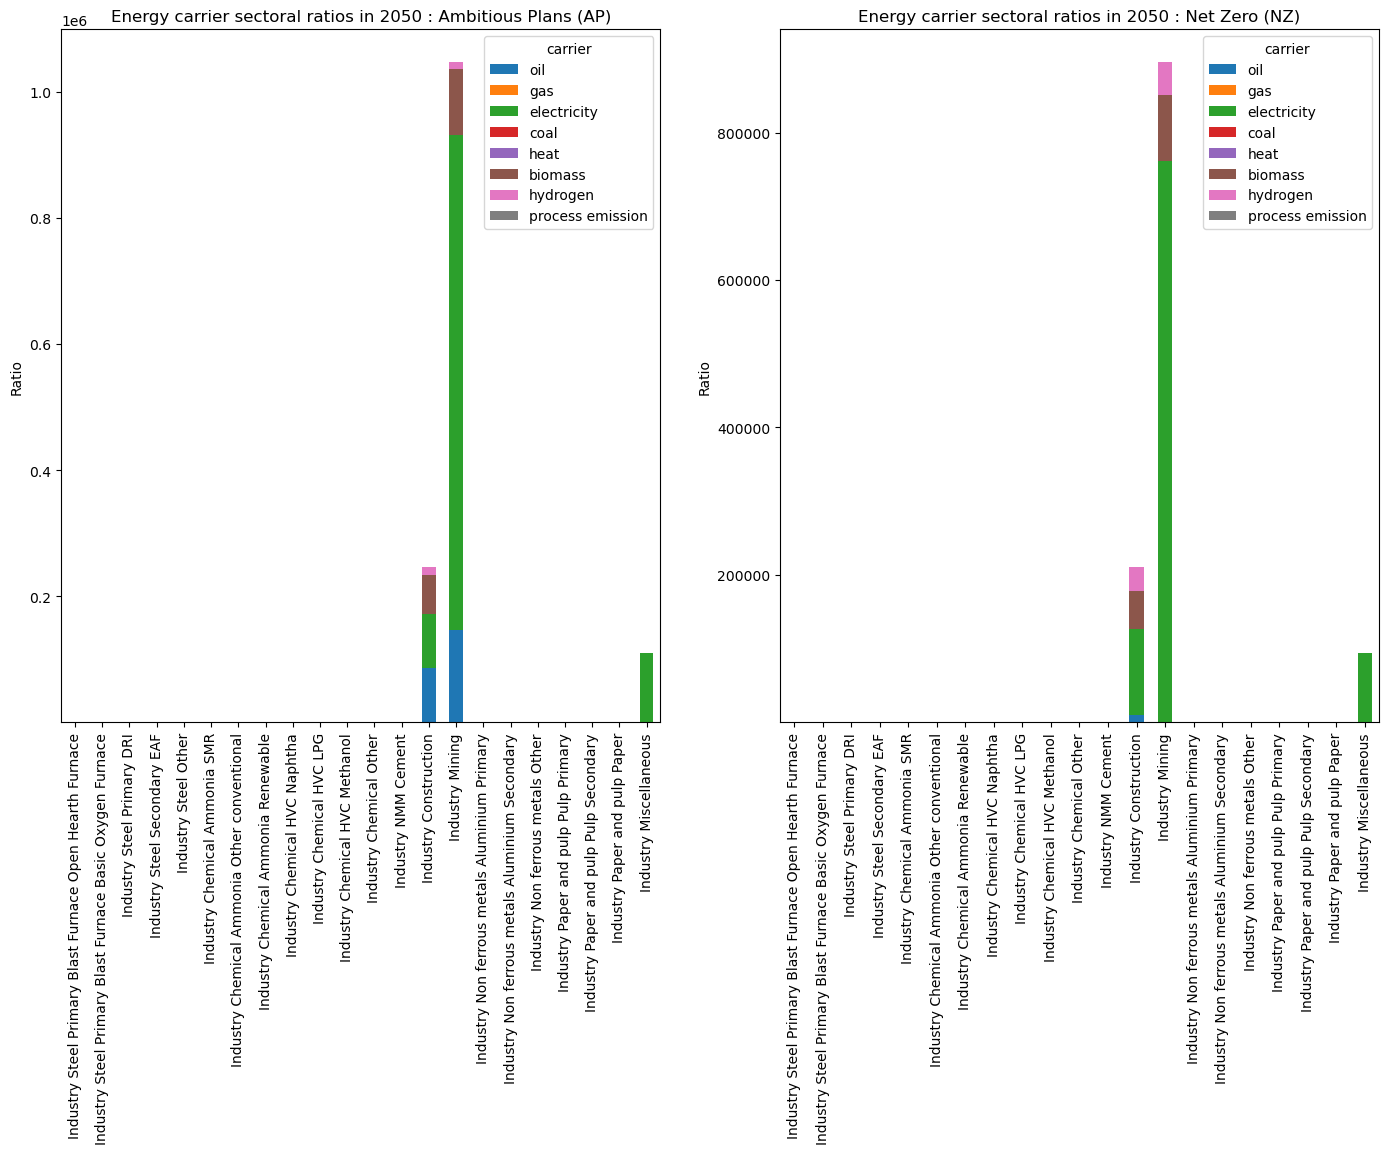

In [7]:
#2050 data
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(17, 9)

df3 = pd.read_csv(industry_share_ap_50, keep_default_na=False,na_values=[""])
df3 = df3.set_index('carrier')
df3 = df3.transpose()
df3= df3.loc[(df3!=0).any(axis=1)]

df3.plot(kind="bar", stacked = True, ax=ax[0], title= "Energy carrier sectoral ratios in 2050 : Ambitious Plans (AP)", ylabel = "Ratio")
df4 = pd.read_csv(industry_share_nz_50, keep_default_na=False,na_values=[""])
df4 = df4.set_index('carrier')
df4 = df4.transpose()
df4= df4.loc[(df4!=0).any(axis=1)]

df4.plot(kind="bar", stacked = True, ax=ax[1], title= "Energy carrier sectoral ratios in 2050 : Net Zero (NZ)", ylabel = "Ratio")


<AxesSubplot:title={'center':'Sectoral energy demand in Namibia for multiple scenarios'}, ylabel='TWh'>

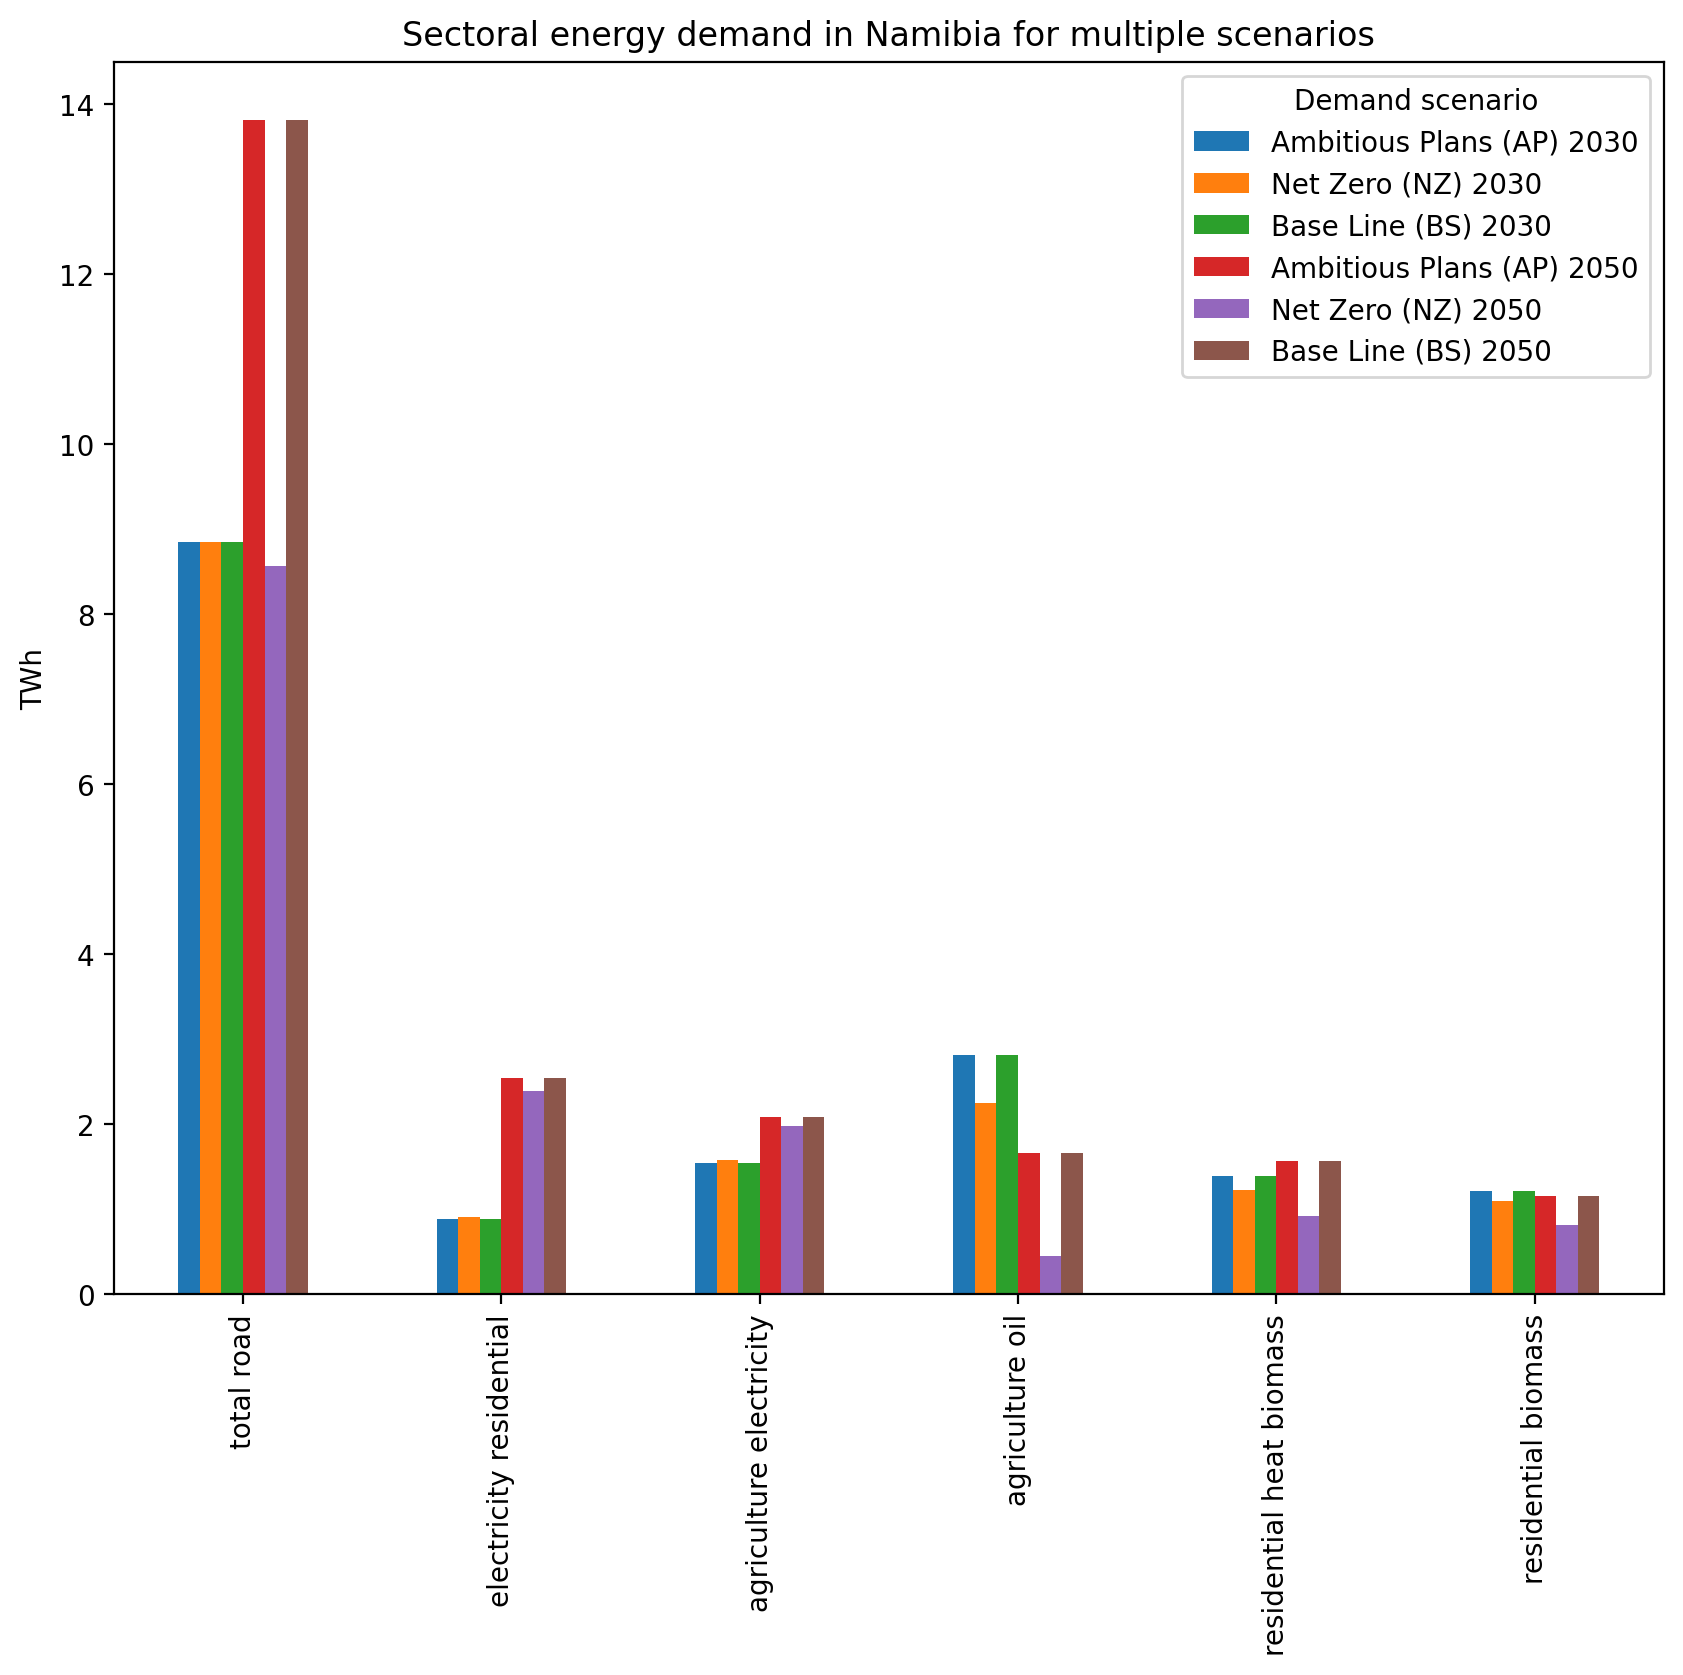

In [8]:
li = []
df = []

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10, 8)
fig.set_dpi(200)

df1 = pd.read_csv(etotals_ap, keep_default_na=False,na_values=[""])
df1["Demand scenario"] = "Ambitious Plans (AP) 2030"
li.append(df1)
df2 = pd.read_csv(etotals_nz, keep_default_na=False,na_values=[""])
df2["Demand scenario"] = "Net Zero (NZ) 2030"
li.append(df2)
df3 = pd.read_csv(etotals_bs, keep_default_na=False,na_values=[""])
df3["Demand scenario"] = "Base Line (BS) 2030"
li.append(df3)

#2050
df4 = pd.read_csv(etotals_ap_50, keep_default_na=False,na_values=[""])
df4["Demand scenario"] = "Ambitious Plans (AP) 2050"
li.append(df4)
df5 = pd.read_csv(etotals_nz_50, keep_default_na=False,na_values=[""])
df5["Demand scenario"] = "Net Zero (NZ) 2050"
li.append(df5)
df6 = pd.read_csv(etotals_bs_50, keep_default_na=False,na_values=[""])
df6["Demand scenario"] = "Base Line (BS) 2050"
li.append(df6)

df = pd.concat(li, axis=0, ignore_index=True)
df = df.drop(['country'], axis=1)
df = df.set_index('Demand scenario')
df = df.transpose()
df= df.loc[(df!=0).any(axis=1)]
df= df.dropna()
df= df.sort_values(by='Base Line (BS) 2050', ascending=False)
df= df.head(6)
df.plot(kind="bar", title= "Sectoral energy demand in Namibia for multiple scenarios", ylabel = "TWh", ax=ax)